# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Import the necessary libraries

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1

#### Read the dataset

In [199]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3830 non-null   object 
 3   Country_Region       4005 non-null   object 
 4   Last_Update          4005 non-null   object 
 5   Lat                  3917 non-null   float64
 6   Long_                3917 non-null   float64
 7   Confirmed            4005 non-null   int64  
 8   Deaths               4005 non-null   int64  
 9   Recovered            4005 non-null   int64  
 10  Active               4005 non-null   int64  
 11  Combined_Key         4005 non-null   object 
 12  Incident_Rate        3916 non-null   float64
 13  Case_Fatality_Ratio  3957 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.2+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


#### Display the top 5 rows in the data

In [216]:
pd.DataFrame(np.random.rand(5))

,0
0,0.848812
1,0.239311
2,0.626355
3,0.371063
4,0.614303


#### Show the information of the dataset

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3830 non-null   object 
 3   Country_Region       4005 non-null   object 
 4   Last_Update          4005 non-null   object 
 5   Lat                  3917 non-null   float64
 6   Long_                3917 non-null   float64
 7   Confirmed            4005 non-null   int64  
 8   Deaths               4005 non-null   int64  
 9   Recovered            4005 non-null   int64  
 10  Active               4005 non-null   int64  
 11  Combined_Key         4005 non-null   object 
 12  Incident_Rate        3916 non-null   float64
 13  Case_Fatality_Ratio  3957 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.2+ KB


#### Show the sum of missing values of features in the dataset

In [202]:
df.isnull().sum()

FIPS                   740
Admin2                 735
Province_State         175
Country_Region           0
Last_Update              0
Lat                     88
Long_                   88
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [203]:
world = df.groupby("Country_Region")['Confirmed'].sum().reset_index()
world.head()

,Country_Region,Confirmed
0,Afghanistan,52513
1,Albania,58316
2,Algeria,99897
3,Andorra,8117
4,Angola,17568


#### Show the number of Deaths by Country

In [204]:
world = df.groupby("Country_Region")['Deaths'].sum().reset_index()
world.head()

,Country_Region,Deaths
0,Afghanistan,2201
1,Albania,1181
2,Algeria,2762
3,Andorra,84
4,Angola,405


#### Show the number of Recovered cases by Country

In [205]:
world = df.groupby("Country_Region")['Recovered'].sum().reset_index()
world.head()

,Country_Region,Recovered
0,Afghanistan,41727
1,Albania,33634
2,Algeria,67395
3,Andorra,7463
4,Angola,11146


#### Show the number of Active Cases by Country

In [206]:
world = df.groupby("Country_Region")['Active'].sum().reset_index()
world.head()

,Country_Region,Active
0,Afghanistan,8585
1,Albania,23501
2,Algeria,29740
3,Andorra,570
4,Angola,6017


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [218]:
world = df.groupby("Country_Region")['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
world.head()

C:\Users\JABS\AppData\Local\Temp/ipykernel_8804/4148972617.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = df.groupby("Country_Region")['Confirmed','Deaths','Recovered','Active'].sum().reset_index()


,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,52513,2201,41727,8585
1,Albania,58316,1181,33634,23501
2,Algeria,99897,2762,67395,29740
3,Andorra,8117,84,7463,570
4,Angola,17568,405,11146,6017


### Question 3

### Show the countries with no recovered cases

In [208]:
world = df.groupby('Country_Region')['Recovered'].sum().reset_index()
result = df[df['Recovered']==0][['Country_Region','Recovered']]
print(result)

            Country_Region  Recovered
9                Australia          0
23                 Belgium          0
24                 Belgium          0
25                 Belgium          0
26                 Belgium          0
...                    ...        ...
4000                 Tonga          0
4001  Winter Olympics 2022          0
4002            Antarctica          0
4003        United Kingdom          0
4004        United Kingdom          0

[3402 rows x 2 columns]


#### Show the countries with no confirmed cases

In [209]:
world = df.groupby('Country_Region')['Confirmed'].sum().reset_index()
result = df[df['Confirmed']==0][['Country_Region','Confirmed']]
print(result)

            Country_Region  Confirmed
78                  Canada          0
174               Colombia          0
265                  India          0
280                  India          0
414                 Mexico          0
485                   Peru          0
612                  Spain          0
700                     US          0
712                     US          0
721                     US          0
742                     US          0
756                     US          0
760                     US          0
894                     US          0
945                     US          0
1215                    US          0
1445                    US          0
1656                    US          0
1776                    US          0
1822                    US          0
1859                    US          0
1890                    US          0
2155                    US          0
2335                    US          0
2449                    US          0
2558        

#### Show the countries with no deaths

In [215]:
world = df.groupby('Country_Region')['Deaths'].sum().reset_index()
result = df[df['Deaths']==0][['Country_Region','Deaths']]
print(result)

Empty DataFrame
Columns: [Country_Region, Deaths]
Index: []


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [210]:
world = df.groupby("Country_Region")['Confirmed'].sum().reset_index()
world.head(10)

,Country_Region,Confirmed
0,Afghanistan,52513
1,Albania,58316
2,Algeria,99897
3,Andorra,8117
4,Angola,17568
5,Antarctica,0
6,Antigua and Barbuda,159
7,Argentina,1629594
8,Armenia,159738
9,Australia,28460


#### Show the Top 10 Countries with Active cases

In [211]:
world = df.groupby("Country_Region")['Active'].sum().reset_index()
world.head(10)

,Country_Region,Active
0,Afghanistan,8585
1,Albania,23501
2,Algeria,29740
3,Andorra,570
4,Angola,6017
5,Antarctica,0
6,Antigua and Barbuda,6
7,Argentina,159599
8,Armenia,13555
9,Australia,4978


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

C:\Users\JABS\AppData\Local\Temp/ipykernel_8804/3550498885.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(["Country_Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()


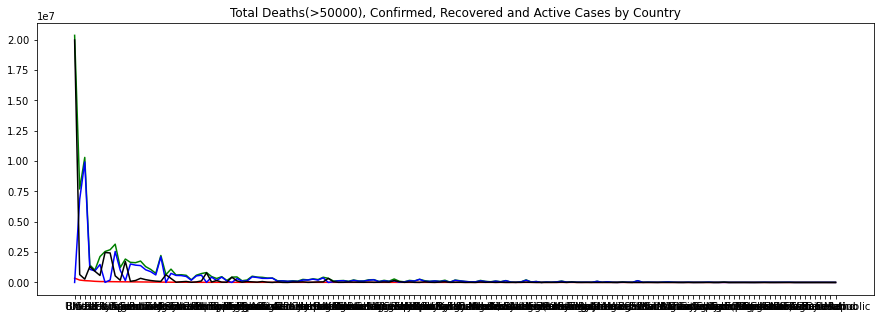

In [212]:
df = df.groupby(["Country_Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
df = df.sort_values(by='Deaths', ascending=False)
df = df[df['Deaths']>50]
plt.figure(figsize=(15, 5))
plt.plot(df['Country_Region'], df['Deaths'],color='red')
plt.plot(df['Country_Region'], df['Confirmed'],color='green')
plt.plot(df['Country_Region'], df['Recovered'], color='blue')
plt.plot(df['Country_Region'], df['Active'], color='black')
 
plt.title('Total Deaths(>50000), Confirmed, Recovered and Active Cases by Country')
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [226]:
import plotly.express as px
import plotly.io as pio

In [242]:
df = df[df['Country_Region']=='US'].drop(df.columns['Country_Region','Lat', 'Long_'],axis=1)
df = df[df.sum(axis = 1) > 0]
df = df.groupby(['Province/State'])['Deaths'].sum().reset_index()
df_death = df[df['Deaths'] > 0]
state_fig = px.bar(df_death, x='Province/State', y='Deaths', title='State wise deaths reported of COVID-19 in USA', text='Deaths')
state_fig.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [ ]:
covid_data.columns

### Question 7

### Plot Province/State Wise Active Cases in USA

### Question 8

### Plot Province/State Wise Confirmed cases in USA

### Question 9

### Plot Worldwide Confirmed Cases over time

In [222]:
import plotly.express as px
import plotly.io as pio

ModuleNotFoundError: No module named 'plotly'

In [225]:
import plotly.express as px